In [1]:
from itertools import product, combinations
import matplotlib.pyplot as plt
import numpy as np
from src import k_tree
from src.utils import data as dt
import torch
from src.k_tree import Ktree
from src.utils.data import loadData, loadData_3d
from src.metrics import Linf_simple
from src import ellipses as el

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = "cpu"
data = np.load('./data/ellipses/10000el_1_3.npy', allow_pickle=True)
data = np.array([data[i].ellipse.to_vector() for i in range(len(data))])


#data = rects
learning_rate = 5e-3 # 1e-2, 5e-3
k = 4
teacher_args = {
    "optimizer_lr": learning_rate,
    "epochs": 800, # 300
    "times": 20,
    "alpha": 0.1, #  projection loss 0.1
    "beta": 0.1, # latent loss 0.1
    "gamma": 0.011, # repulsive loss 0.01
    #"gamma": 0.4, # repulsive loss 0.01
    "delta": 0.1, # fuzzy scale 0.01
    "f_clk": 10, # 20
    "scale": 1, # fuzzy scale 
    "scale_flag": False,
    "number_of_centroids": k,
    "latent_size": 200,
    "encoder_activation": False,
    "encoder_depth": 5,
    "predictor_width": 5*100,
    "predictor_depth": 5,
}
n = 30
un_args = {
    "N": n,
    "M": n**2-1, # 10000 - 1
    "epsilon": 0.15 # here a layer value should be somehow included. As layers get denser  epilson should be smaller
}
student_args = {
    "optimizer_lr": 5e-3,
    "epochs": 3000, # 30000, 3000
    "width": 200,
    "depth": 5,
}

# thresshold = 0.1 * len(data)
threshold = k * 100
ktree = Ktree(threshold, data, el.distance_ellipse_2_point, teacher_args, un_args, student_args, device)
ktree.create_tree()






Creating student for node 0 that has 10000 data, which is more than the threshold 400.
Bounding box for node 0: [[-6317, 6320], [-6317, 6320]]
Creating teacher for node 0 with 4 centroids.
Training Teacher Model
Shuffling data
Epoch: 40/800.. 
 Training loss: 1950.29529.. 
 torch.mean(F): 1950.28369.. 
 Reg Proj: 0.00000.. 
 Reg Latent: 0.01134.. 
 Repulsive: 0.00021.. 
 Memory: 195.02837.. 
 Memory: 195.02837.. 
 Output: 
 [[ -337.26492  -129.9172 ]
 [  545.2942    205.16336]
 [-1081.3712   -407.5017 ]
 [  302.83557   113.23293]]
Epoch: 80/800.. 
 Training loss: 1354.39197.. 
 torch.mean(F): 1353.47339.. 
 Reg Proj: 0.00000.. 
 Reg Latent: 0.91853.. 
 Repulsive: 0.00004.. 
 Memory: 135.34734.. 
 Memory: 135.34734.. 
 Output: 
 [[ -804.1666   -360.55817]
 [ 3966.1067   1373.8466 ]
 [-3764.0864  -1160.2753 ]
 [ 2359.457    1028.1335 ]]
Epoch: 120/800.. 
 Training loss: 2043.96509.. 
 torch.mean(F): 2043.93506.. 
 Reg Proj: 0.00000.. 
 Reg Latent: 0.02949.. 
 Repulsive: 0.00046.. 
 Memo

/home/geoten/Projects/GeoCluster/src/ellipses.py:41: RuntimeWarning: invalid value encountered in scalar divide
  ys = [(pow(b, 2) * p_y * xs[0]) / (-k * xs[0] + pow(a, 2) * p_x),
/home/geoten/Projects/GeoCluster/src/ellipses.py:42: RuntimeWarning: invalid value encountered in scalar divide
  (pow(b, 2) * p_y * xs[1]) / (-k * xs[1] + pow(a, 2) * p_x)]


Epoch: 80/800.. 
 Training loss: 2277.86157.. 
 torch.mean(F): 2261.05347.. 
 Reg Proj: 16.50221.. 
 Reg Latent: 0.30571.. 
 Repulsive: 0.00028.. 
 Memory: 226.10535.. 
 Memory: 226.10535.. 
 Output: 
 [[1055.9209  4864.315  ]
 [1261.7019  5334.723  ]
 [1334.8568  4681.7495 ]
 [ 919.76904 5529.2617 ]]
Epoch: 120/800.. 
 Training loss: 680.61414.. 
 torch.mean(F): 679.35907.. 
 Reg Proj: 1.06692.. 
 Reg Latent: 0.18730.. 
 Repulsive: 0.00088.. 
 Memory: 67.93591.. 
 Memory: 67.93591.. 
 Output: 
 [[1569.4783 3126.1003]
 [1419.207  3099.4648]
 [1382.4016 3308.2087]
 [1378.214  3030.8064]]
Epoch: 160/800.. 
 Training loss: 418.37292.. 
 torch.mean(F): 416.27695.. 
 Reg Proj: 1.89188.. 
 Reg Latent: 0.20277.. 
 Repulsive: 0.00134.. 
 Memory: 41.62769.. 
 Memory: 41.62769.. 
 Output: 
 [[1835.8491 2550.9673]
 [1770.2117 2449.933 ]
 [1996.1261 2764.4385]
 [1869.6962 2567.7363]]
Epoch: 200/800.. 
 Training loss: 537.27148.. 
 torch.mean(F): 534.77411.. 
 Reg Proj: 2.35836.. 
 Reg Latent: 0.13

LinAlgError: Array must not contain infs or NaNs

In [ ]:
# Report some tree stats.
leaves = ktree.get_leaves()
number_of_nodes = ktree.number_of_nodes

height = max([len(leaf.index) for leaf in leaves])
print(f"Tree height is {height}.")

leaf_sizes = [len(leaf.data) for leaf in leaves]
print(f"Created {len(leaves)} leaves with sizes")
print(leaf_sizes)
print(number_of_nodes)

NameError: name 'ktree' is not defined

The percentage of correct predictions per layer is: 
[72.         64.         46.33333333 35.66666667 17.          4.66666667]
The percentage of correct predictions per layer is: 
[71.66666667 61.         43.33333333 33.33333333 15.33333333  3.        ]
The percentage of correct predictions per layer is: 
[70.         62.33333333 41.         33.33333333 16.33333333  7.        ]
The percentage of correct predictions per layer is: 
[73.66666667 64.33333333 44.33333333 37.         19.          5.        ]
The mean percentage of correct predictions is: 
[71.83333333 62.91666667 43.75       34.83333333 16.91666667  4.91666667]


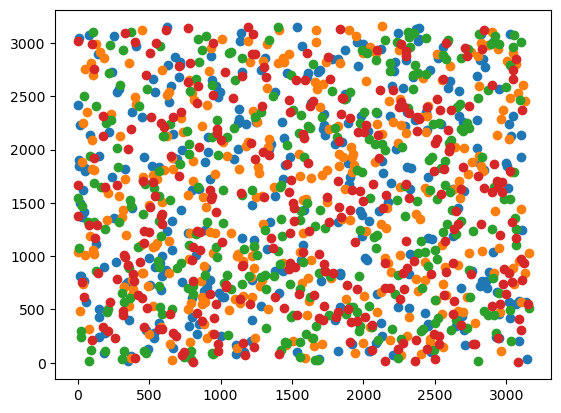

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
mean_acc_per_layer = np.zeros(height)
times=0

data_full = np.load('./data/ellipses/10000el_1_3.npy', allow_pickle=True)
boxes_x_min = min([data_full[i].x_min for i in range(len(data_full))])
boxes_x_max = max([data_full[i].x_max for i in range(len(data_full))])
boxes_y_min = min([data_full[i].y_min for i in range(len(data_full))])
boxes_y_max = max([data_full[i].y_max for i in range(len(data_full))])

while times < 4:
    # now lets create randomly N points in the space 0-300, 0-300
    n = 300
    random_p = torch.zeros(n, 2)
    x_lim = [boxes_x_min, boxes_x_max]
    y_lim = [boxes_y_min, boxes_y_max]


    for i in range(n):
        random_p[i] = torch.Tensor([np.random.randint(*x_lim), np.random.randint(*y_lim)])
        
    infer_points = random_p.to(device)
    plt.scatter(infer_points[:,0], infer_points[:,1])

    correct_predictions_per_layer = np.zeros(height)
    accuracy_per_layer = np.zeros(height)

    qp = infer_points
    for i, query_point in enumerate(qp):
        preds_per_layer = ktree.query_verbose(query_point)["predictions per layer"]
        brute_force = ktree.root.query(query_point)

        for j, pred in enumerate(preds_per_layer):
            if np.array_equal(pred, brute_force):
                correct_predictions_per_layer[j] += 1

    accuracy_per_layer = correct_predictions_per_layer / len(infer_points) * 100
    mean_acc_per_layer += accuracy_per_layer
    times += 1
    print(f"The percentage of correct predictions per layer is: ")
    print(accuracy_per_layer)

print(f"The mean percentage of correct predictions is: ")
print(mean_acc_per_layer/times)

The percentage of correct predictions per layer is: 
[72.8 63.2 42.6 34.  13.8  3.2]
The percentage of correct predictions per layer is: 
[72.8 63.2 42.6 34.  13.8  3.2]
The percentage of correct predictions per layer is: 
[72.8 63.2 42.6 34.  13.8  3.2]
The percentage of correct predictions per layer is: 
[72.8 63.2 42.6 34.  13.8  3.2]
The mean percentage of correct predictions is: 
[72.8 63.2 42.6 34.  13.8  3.2]


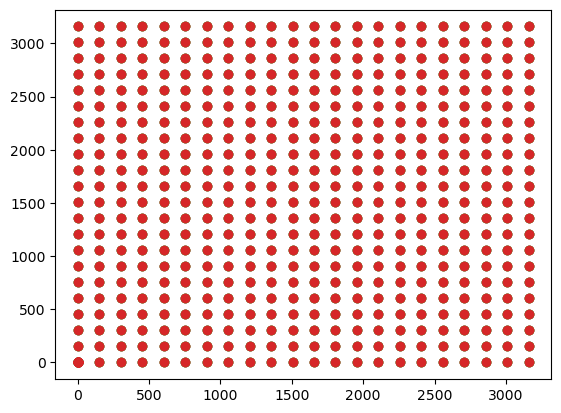

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
mean_acc_per_layer = np.zeros(height)
times=0

data_full = np.load('./data/ellipses/10000el_1_3.npy', allow_pickle=True)
boxes_x_min = min([data_full[i].x_min for i in range(len(data_full))])
boxes_x_max = max([data_full[i].x_max for i in range(len(data_full))])
boxes_y_min = min([data_full[i].y_min for i in range(len(data_full))])
boxes_y_max = max([data_full[i].y_max for i in range(len(data_full))])

while times < 1:
    nop =  500
    random_p = torch.zeros(nop, 2)
    x_lim = [boxes_x_min, boxes_x_max]
    y_lim = [boxes_y_min, boxes_y_max]
    num = int(np.sqrt(nop))
    for i, x in enumerate(np.linspace(x_lim[0],x_lim[1], num)):
        for j, y in enumerate(np.linspace(y_lim[0],y_lim[1], num)):
            random_p[i*num+j] = torch.Tensor([x, y])
    
    infer_points = random_p.to(device)
    plt.scatter(infer_points[:,0], infer_points[:,1])

    correct_predictions_per_layer = np.zeros(height)
    accuracy_per_layer = np.zeros(height)

    qp = infer_points
    for i, query_point in enumerate(qp):
        preds_per_layer = ktree.query_verbose(query_point)["predictions per layer"]
        brute_force = ktree.root.query(query_point)

        for j, pred in enumerate(preds_per_layer):
            if np.array_equal(pred, brute_force):
                correct_predictions_per_layer[j] += 1

    accuracy_per_layer = correct_predictions_per_layer / len(infer_points) * 100
    mean_acc_per_layer += accuracy_per_layer
    times += 1
    print(f"The percentage of correct predictions per layer is: ")
    print(accuracy_per_layer)

print(f"The mean percentage of correct predictions is: ")
print(mean_acc_per_layer/times)